In [1]:
# survey.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [2]:
# pip install xgboost

In [3]:
from xgboost import XGBRegressor

In [4]:
# Reading csv file and Assigning it  to variable "data".
data = pd.read_csv("survey.csv")

In [5]:
# Displaying top 2 lines of data.
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### ABOUT DATA


Timestamp-----------------------------Timestamp

Age-----------------------------------Age

Gender--------------------------------Gender

Country-------------------------------Country

state----------------------------------If you live in the United States, which state or territory do you live in?

self_employed--------------------------Are you self-employed?

family_history-------------------------Do you have a family history of mental illness?

treatment------------------------------Have you sought treatment for a mental health condition?

work_interfere ------------------------If you have a mental health condition, do you feel that it interferes with your work?

no_employees----------------------------How many employees does your company or organization have?

remote_work-----------------------------Do you work remotely (outside of an office) at least 50% of the time?

tech_company----------------------------Is your employer primarily a tech company/organization?

benefits--------------------------------Does your employer provide mental health benefits?

care_options----------------------------Do you know the options for mental health care your employer provides?

wellness_program-----------------------Has your employer ever discussed mental health as part of an employee wellness program?

seek_help------------------Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity---Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave-----------------------------------How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence--Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence--Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers----------------------------Would you be willing to discuss a mental health issue with your coworkers?

supervisor--------------------Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview--------------Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview------------------Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical-------------Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence----Have you heard of or observed negative consequences for coworkers 
                    with mental health conditions in your workplace?
    
comments----------Any additional notes or comments


In [6]:
# Number of columns in a Data Set.
len(data.columns)

27

In [7]:
# Number of Rows in a Data Set.
len(data.index)

1259

In [8]:
# Shape describes the number of rows and number of columns (rows, Columns) in data set.
data.shape

(1259, 27)

In [9]:
# Count - ignores the missing values and count values in each column.
data.count()

Timestamp                    1259
Age                          1259
Gender                       1259
Country                      1259
state                         744
self_employed                1241
family_history               1259
treatment                    1259
work_interfere                995
no_employees                 1259
remote_work                  1259
tech_company                 1259
benefits                     1259
care_options                 1259
wellness_program             1259
seek_help                    1259
anonymity                    1259
leave                        1259
mental_health_consequence    1259
phys_health_consequence      1259
coworkers                    1259
supervisor                   1259
mental_health_interview      1259
phys_health_interview        1259
mental_vs_physical           1259
obs_consequence              1259
comments                      164
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [11]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [12]:
# Number of unique values in each column.
# Syntax: To print Bold : print('\033[1m' + 'hai' + '\033[0m').

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

print(color.PURPLE + color.UNDERLINE +color.BOLD + 'Unique values in Columns'+ color.END,"\n")

for columns in data.columns:
    print(color.GREEN + columns + ":" + color.END,len(data[columns].unique()))

Unique values in Columns 

Timestamp: 1246
Age: 53
Gender: 49
Country: 48
state: 46
self_employed: 3
family_history: 2
treatment: 2
work_interfere: 5
no_employees: 6
remote_work: 2
tech_company: 2
benefits: 3
care_options: 3
wellness_program: 3
seek_help: 3
anonymity: 3
leave: 5
mental_health_consequence: 3
phys_health_consequence: 3
coworkers: 3
supervisor: 3
mental_health_interview: 3
phys_health_interview: 3
mental_vs_physical: 3
obs_consequence: 2
comments: 161


In [13]:

for column in data.columns:
    print(color.GREEN + column + ":" + color.END,data[column].unique(),"\n")

Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31'] 

Age: [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72] 

Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binar

In [14]:
# Number of Null Values in each column.
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [15]:
# Dropping columns
df = data.drop(columns=['state', 'comments', 'Timestamp','Country','no_employees'])

In [16]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [17]:
# Imputing

df['self_employed'] = df['self_employed']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No'], size=len(df))))

df['work_interfere'] = df['work_interfere']\
                      .fillna(pd.Series(np.random.choice(['Sometimes', 'Never', 'Rarely', 'Often']
                                                         ,size=len(df))))

print('\033[1m' + 'Total empty values in the Dataset :' + '\033[0m' , df.isnull().sum().sum())

Total empty values in the Dataset : 0


In [18]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,Yes,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,Yes,No,No,Rarely,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Yes,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [19]:
df.groupby("tech_company").get_group("Yes")

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,Yes,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2,32,Male,Yes,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,No,Yes,No,Sometimes,No,Yes,Yes,Not sure,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,male,No,Yes,Yes,Sometimes,Yes,Yes,Yes,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1254,26,male,No,No,Yes,Sometimes,No,Yes,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,Yes,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,No,Yes,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


In [20]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [21]:
# gender have 49 unique values we will make it it 3(Male,Female,Other)
other  = ['A little about you', 'p', 'Nah', 'Enby', 'Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male, unsure what that really means','trans']
male   = ['male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man', 'msle','cis male', 'Cis Man','Malr','Mail']
female = ['Female', 'female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']

df['Gender'].replace(to_replace = other, value = 'other', inplace=True)
df['Gender'].replace(to_replace = male, value = 'M', inplace=True)
df['Gender'].replace(to_replace = female, value = 'F', inplace=True)

In [22]:
df["Gender"].unique()

array(['F', 'M', 'other'], dtype=object)

In [23]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [24]:
Age = []
for i in df.Age:
    if (i<18):
        Age.append(35)
    elif (i>60):
        Age.append(55)
    else:
        Age.append(i)

df["Age"] = Age

In [25]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 51, 49, 53], dtype=int64)

In [26]:
print('\033[1m' + 'Range of column Age (Before) :' + '\033[0m', (data.Age.min(), data.Age.max()))
print('\033[1m' + 'Range of column Age :' + '\033[0m', (df.Age.min(), df.Age.max()))

Range of column Age (Before) : (-1726, 99999999999)
Range of column Age : (18, 60)


In [27]:
df.describe()

,Age
count,1259.000000
mean,32.095314
std,7.198777
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,60.000000


In [28]:
df.nunique()

Age                          41
Gender                        3
self_employed                 2
family_history                2
treatment                     2
work_interfere                4
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

In [29]:
Health = df

In [30]:
# Numerical Features
sns.set()

<Figure size 432x432 with 0 Axes>

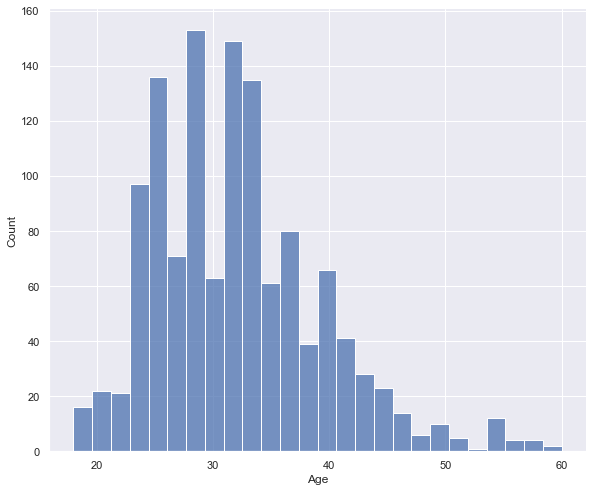

In [31]:
plt.figure(figsize=(6,6))
sns.displot(data=Health, kind='hist',x='Age',height=7, aspect=1.2)
plt.show()

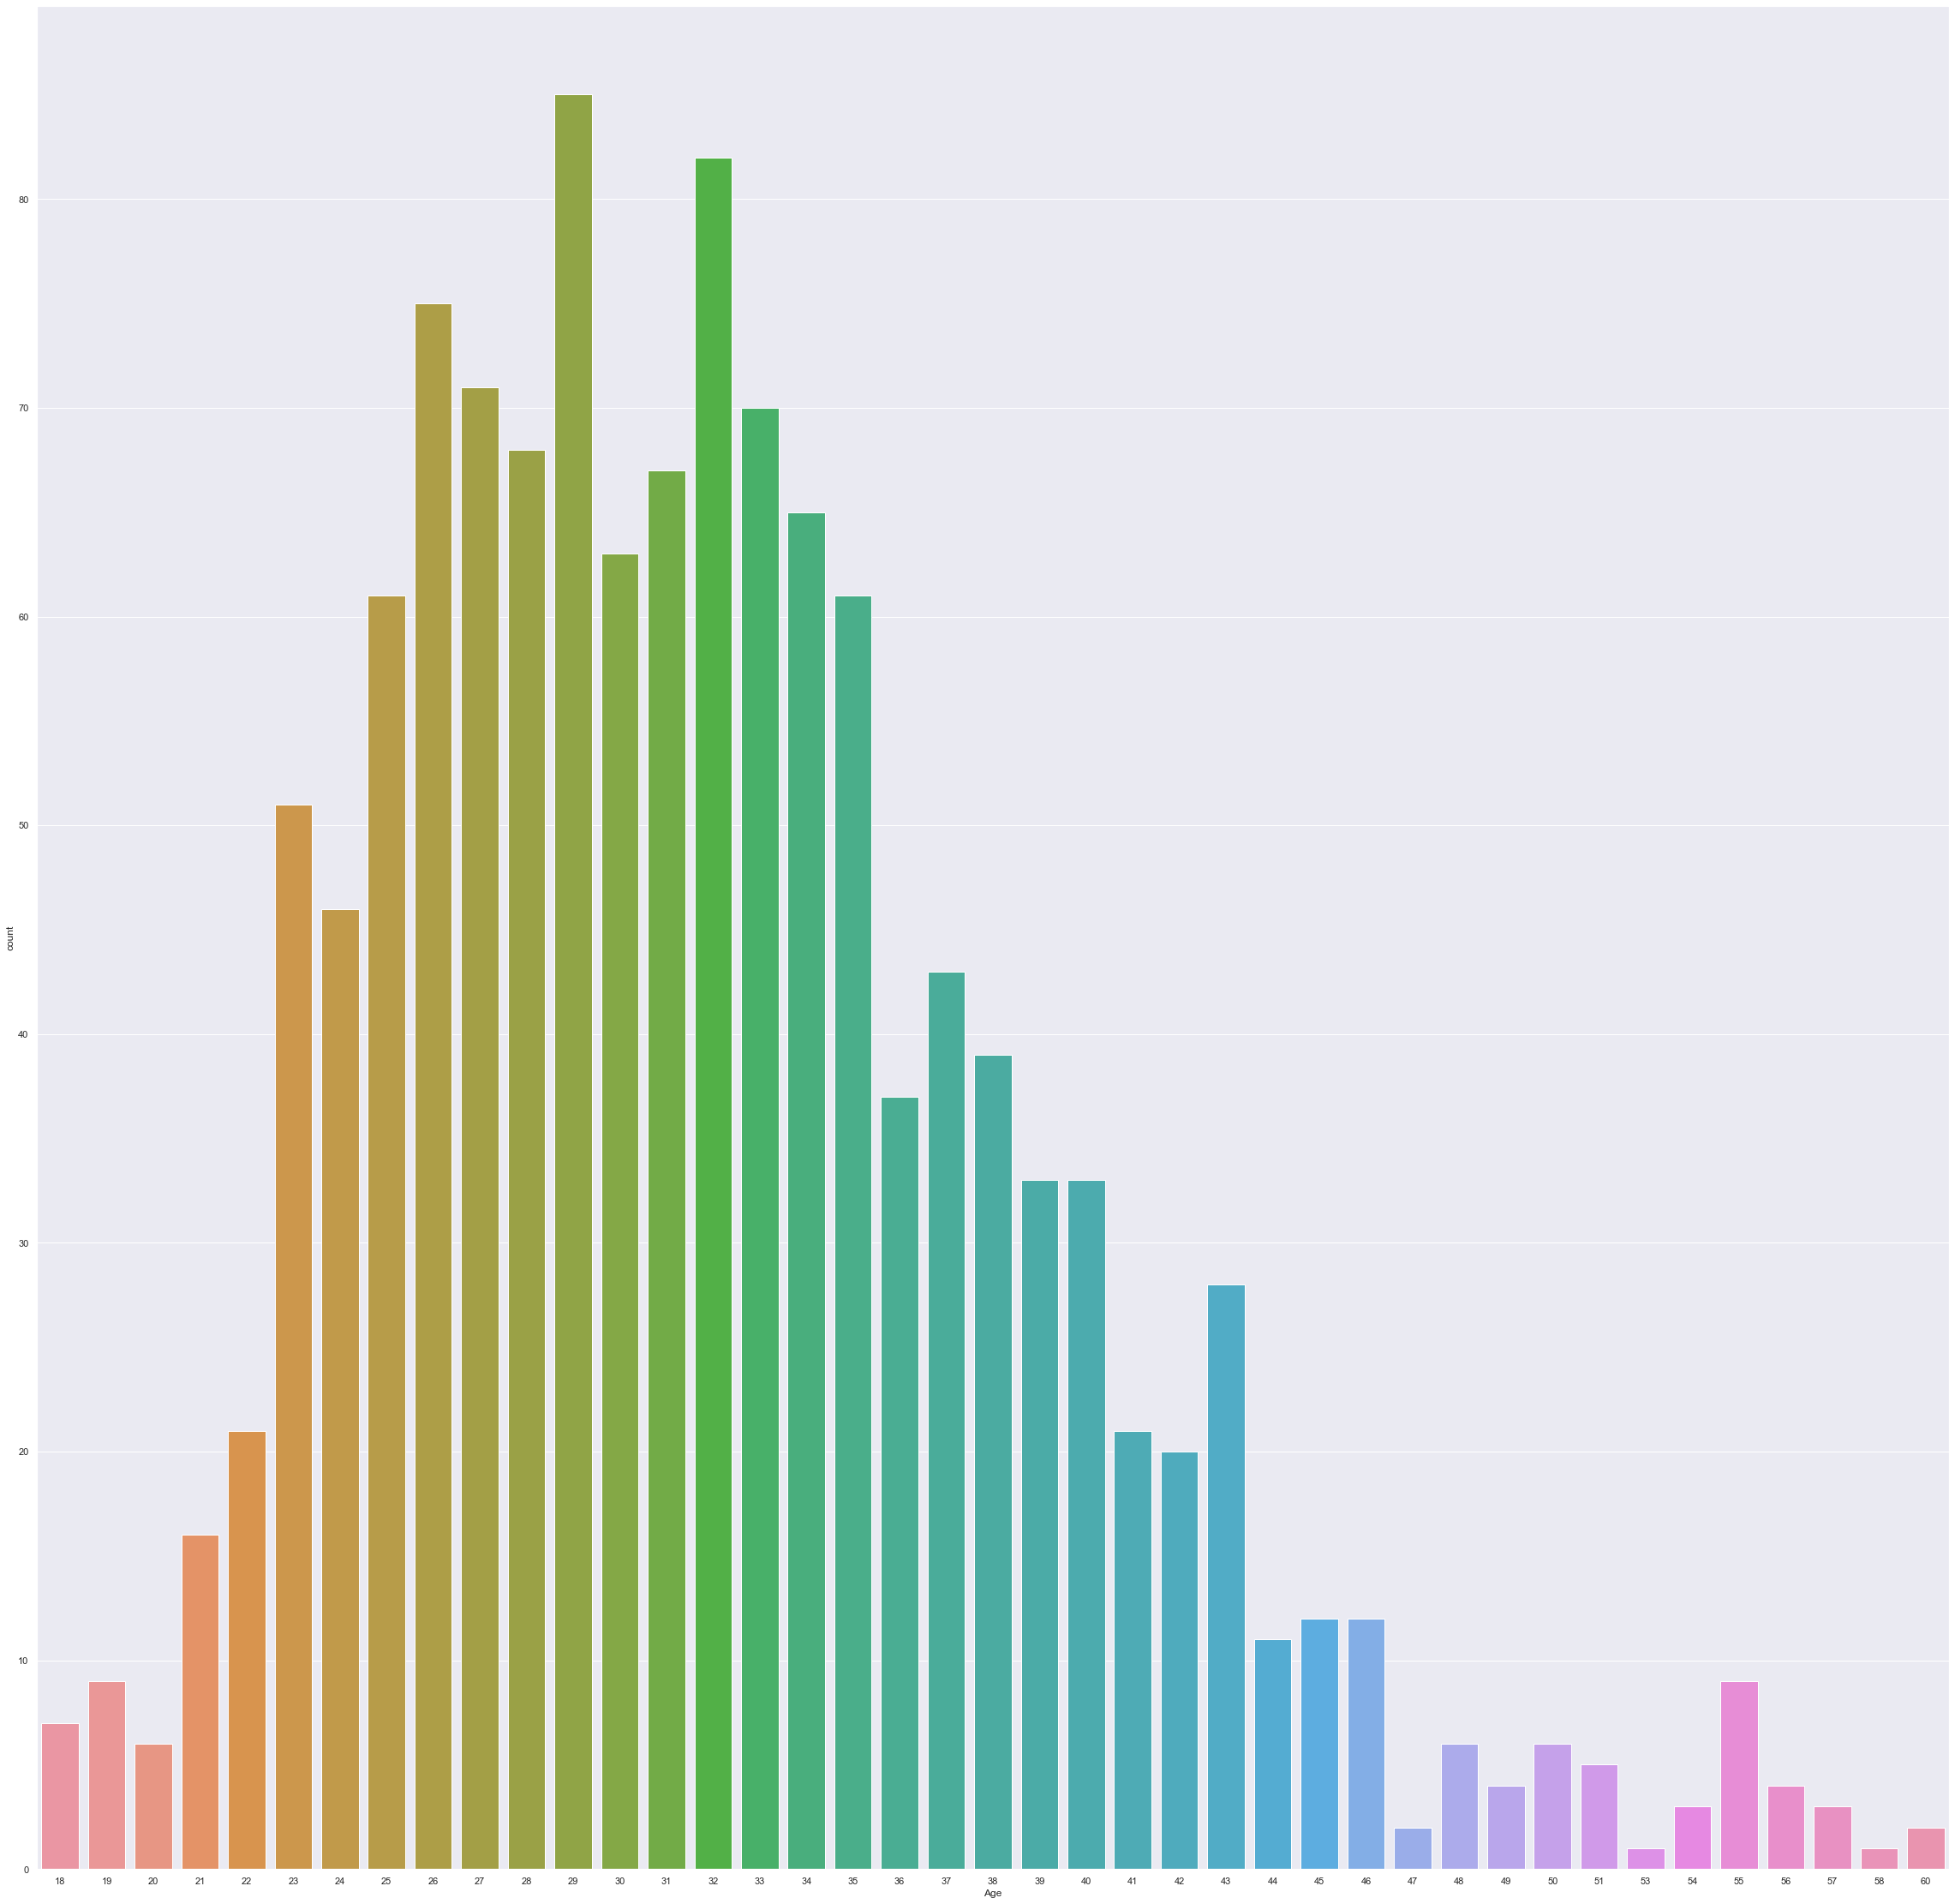

In [32]:
plt.figure(figsize=(40,40))
sns.countplot(x="Age",data=Health)
plt.show()

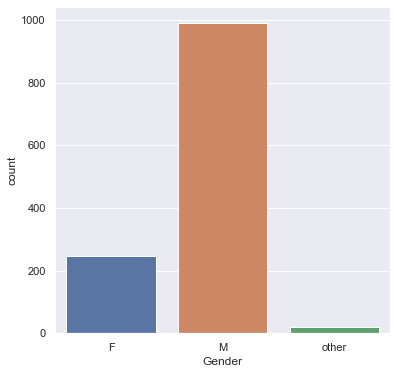

In [33]:
# Categorical Features
# Gender

plt.figure(figsize=(6,6))
sns.countplot(x="Gender", data=Health)
plt.show()

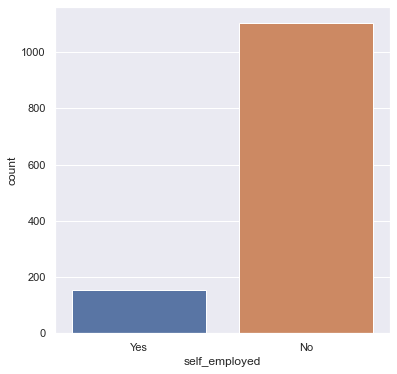

In [34]:
# self_employed Column

plt.figure(figsize=(6,6))
sns.countplot(x="self_employed", data=Health)
plt.show()

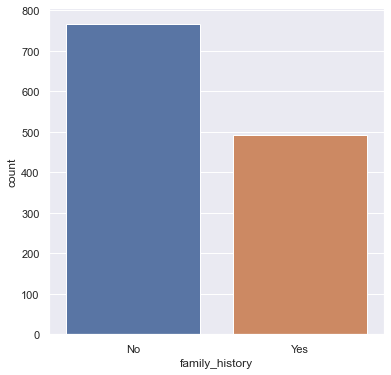

In [35]:
# family_history
plt.figure(figsize=(6,6))
sns.countplot(x="family_history", data=Health)
plt.show()

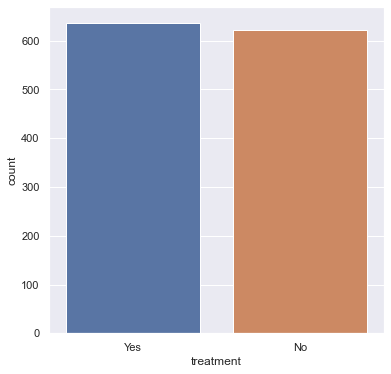

In [36]:
# treatment
plt.figure(figsize=(6,6))
sns.countplot(x="treatment", data=Health)
plt.show()

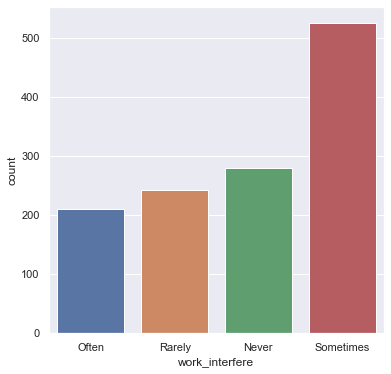

In [37]:
# work_interfere
plt.figure(figsize=(6,6))
sns.countplot(x="work_interfere", data=Health)
plt.show()

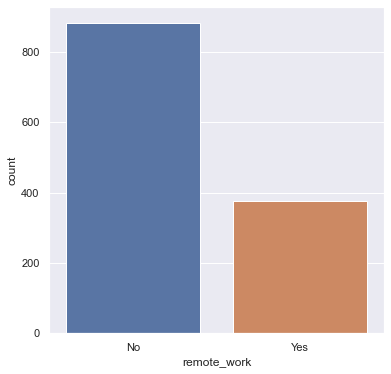

In [38]:
# remote_work
plt.figure(figsize=(6,6))
sns.countplot(x="remote_work", data=Health)
plt.show()

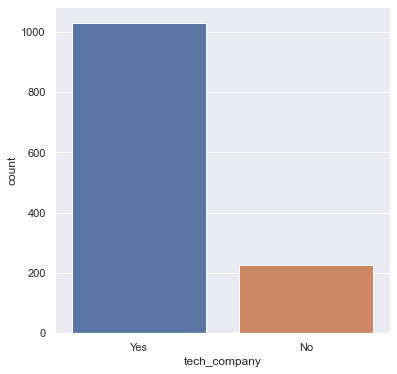

In [39]:
# tech_company
plt.figure(figsize=(6,6))
sns.countplot(x="tech_company", data=Health)
plt.show()

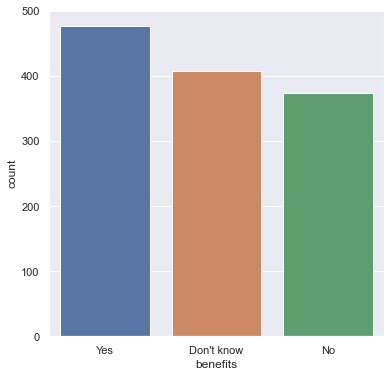

In [40]:
# benefits
plt.figure(figsize=(6,6))
sns.countplot(x="benefits", data=Health)
plt.show()

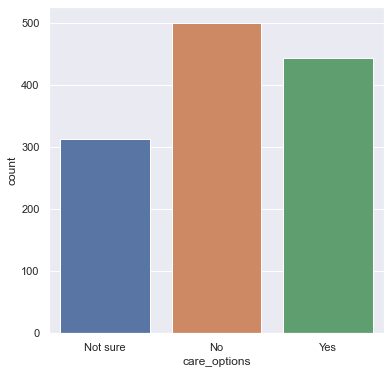

In [41]:
# care_options
plt.figure(figsize=(6,6))
sns.countplot(x="care_options", data=Health)
plt.show()

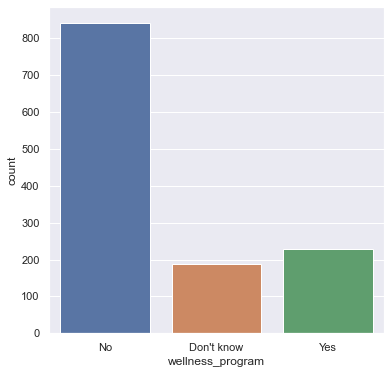

In [42]:
# wellness_program
plt.figure(figsize=(6,6))
sns.countplot(x="wellness_program", data=Health)
plt.show()

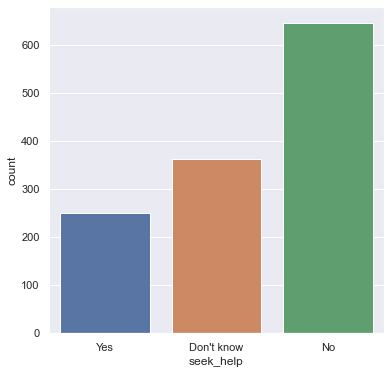

In [43]:
# seek_help
plt.figure(figsize=(6,6))
sns.countplot(x="seek_help", data=Health)
plt.show()

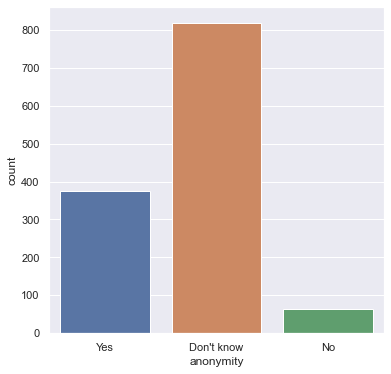

In [44]:
# anonymity
plt.figure(figsize=(6,6))
sns.countplot(x="anonymity", data=Health)
plt.show()

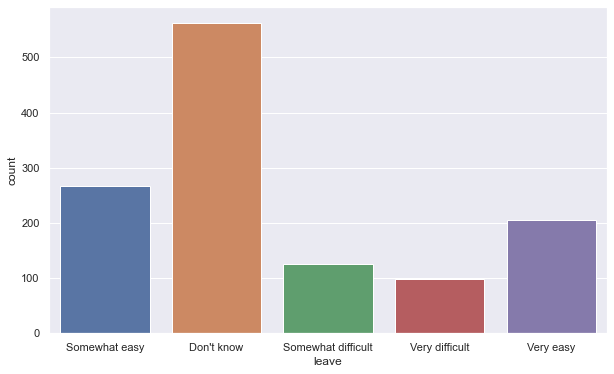

In [45]:
# leave
plt.figure(figsize=(10,6))
sns.countplot(x="leave", data=Health)
plt.show()

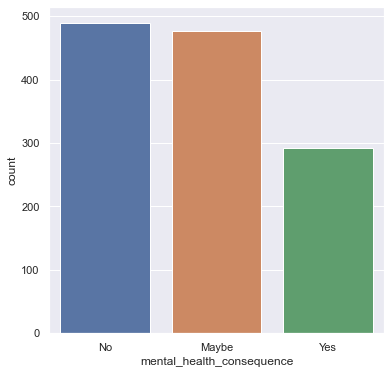

In [46]:
# mental_health_consequence
plt.figure(figsize=(6,6))
sns.countplot(x="mental_health_consequence", data=Health)
plt.show()

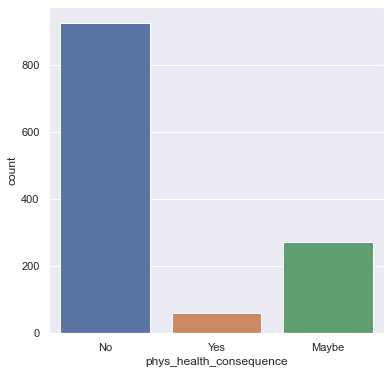

In [47]:
# phys_health_consequence
plt.figure(figsize=(6,6))
sns.countplot(x="phys_health_consequence", data=Health)
plt.show()

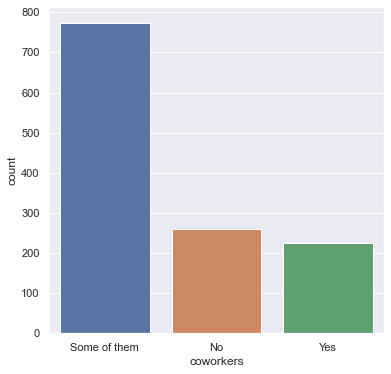

In [48]:
# coworkers
plt.figure(figsize=(6,6))
sns.countplot(x="coworkers", data=Health)
plt.show()

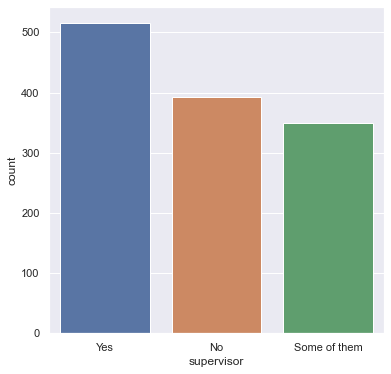

In [49]:
# supervisor
plt.figure(figsize=(6,6))
sns.countplot(x="supervisor", data=Health)
plt.show()

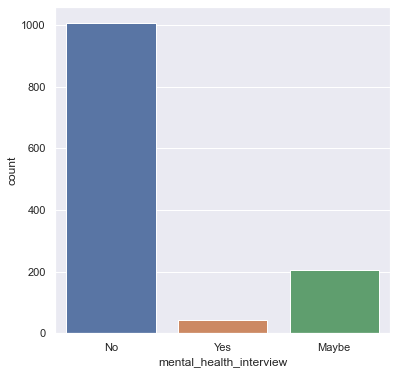

In [50]:
# mental_health_interview
plt.figure(figsize=(6,6))
sns.countplot(x="mental_health_interview", data=Health)
plt.show()

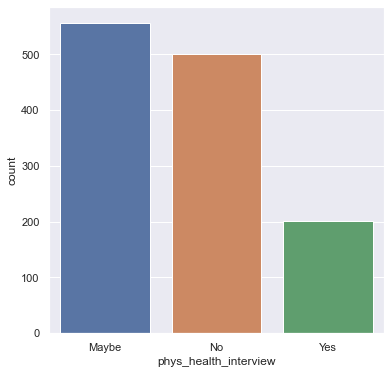

In [51]:
# phys_health_interview
plt.figure(figsize=(6,6))
sns.countplot(x="phys_health_interview", data=Health)
plt.show()

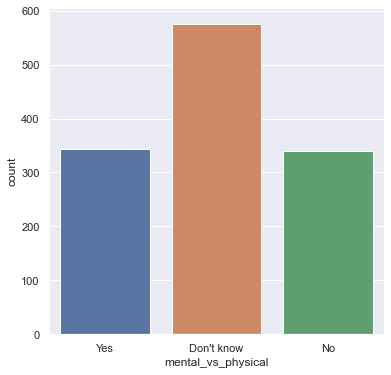

In [52]:
# mental_vs_physical
plt.figure(figsize=(6,6))
sns.countplot(x="mental_vs_physical", data=Health)
plt.show()

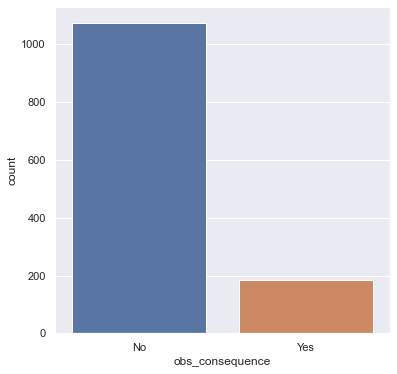

In [53]:
# obs_consequence
plt.figure(figsize=(6,6))
sns.countplot(x="obs_consequence", data=Health)
plt.show()

In [54]:
Health["leave"].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [55]:
Health.replace({"leave":{"Somewhat easy":"Very easy","Somewhat difficult":"Very difficult"}},inplace=True)

In [56]:
Health["leave"].value_counts()

Don't know        563
Very easy         472
Very difficult    224
Name: leave, dtype: int64

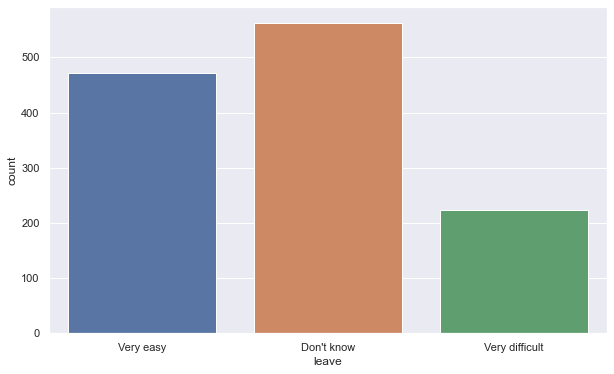

In [57]:
# leave
plt.figure(figsize=(10,6))
sns.countplot(x="leave", data=Health)
plt.show()

In [58]:
Health.nunique()

Age                          41
Gender                        3
self_employed                 2
family_history                2
treatment                     2
work_interfere                4
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         3
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

### ENCODING

In [59]:
encoder = LabelEncoder()

In [60]:
Health_data = Health 

In [61]:
Health_data["Gender"] = encoder.fit_transform(Health_data["Gender"])
Health_data["self_employed"] = encoder.fit_transform(Health_data["self_employed"])
Health_data["family_history"] = encoder.fit_transform(Health_data["family_history"])
Health_data["treatment"] = encoder.fit_transform(Health_data["treatment"])
Health_data["work_interfere"] = encoder.fit_transform(Health_data["work_interfere"])
Health_data["remote_work"] = encoder.fit_transform(Health_data["remote_work"])
Health_data["tech_company"] = encoder.fit_transform(Health_data["tech_company"])
Health_data["benefits"] = encoder.fit_transform(Health_data["benefits"])
Health_data["care_options"] = encoder.fit_transform(Health_data["care_options"])
Health_data["wellness_program"] = encoder.fit_transform(Health_data["wellness_program"])
Health_data["seek_help"] = encoder.fit_transform(Health_data["seek_help"])
Health_data["anonymity"] = encoder.fit_transform(Health_data["anonymity"])
Health_data["leave"] = encoder.fit_transform(Health_data["leave"])
Health_data["mental_health_consequence"] = encoder.fit_transform(Health_data["mental_health_consequence"])
Health_data["phys_health_consequence"] = encoder.fit_transform(Health_data["phys_health_consequence"])
Health_data["coworkers"] = encoder.fit_transform(Health_data["coworkers"])
Health_data["supervisor"] = encoder.fit_transform(Health_data["supervisor"])
Health_data["mental_health_interview"] = encoder.fit_transform(Health_data["mental_health_interview"])
Health_data["phys_health_interview"] = encoder.fit_transform(Health_data["phys_health_interview"])
Health_data["mental_vs_physical"] = encoder.fit_transform(Health_data["mental_vs_physical"])
Health_data["obs_consequence"] = encoder.fit_transform(Health_data["obs_consequence"])


In [62]:
Health_data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,1,0,1,1,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,1,0,0,2,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,1,0,0,2,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


### Splitting Data

In [63]:
# Splitting Features and targets

X = Health_data.drop(columns="treatment", axis=1)
Y = Health_data["treatment"]

In [64]:
print(X)

      Age  Gender  self_employed  family_history  work_interfere  remote_work  \
0      37       0              1               0               1            0   
1      44       1              1               0               2            0   
2      32       1              1               0               2            0   
3      31       1              0               1               1            0   
4      31       1              0               0               0            1   
...   ...     ...            ...             ...             ...          ...   
1254   26       1              0               0               3            0   
1255   32       1              0               1               1            1   
1256   34       1              0               1               3            0   
1257   46       0              0               0               0            1   
1258   25       1              0               1               3            0   

      tech_company  benefit

In [65]:
print(Y)

0       1
1       0
2       0
3       1
4       0
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: treatment, Length: 1259, dtype: int32


In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [67]:
print(X.shape,X_train.shape,X_test.shape)

(1259, 21) (1007, 21) (252, 21)


### Machine learning Model training

In [68]:
# Machine learning Model Training
# XGBoost Regressor

regrosser = XGBRegressor()

In [69]:
regrosser.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
# Prediction on training data

training_data_Prediction = regrosser.predict(X_train)

In [71]:
# train data R squared value
r2_train = metrics.r2_score(Y_train,training_data_Prediction)

In [72]:
print("R squared Value = ", r2_train)

R squared Value =  0.9907266398825851


In [73]:
# prediction on test data

test_data_prediction = regrosser.predict(X_test)

In [74]:
# test R squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [75]:
print("R squared Value = ", r2_train)

R squared Value =  0.9907266398825851


### Building a predictive system

In [76]:
X_train.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'work_interfere',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [77]:
X_train.head()

,Age,Gender,self_employed,family_history,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
663,26,1,1,0,0,1,1,1,0,1,...,0,1,0,1,1,2,0,0,2,0
1174,20,1,0,0,2,0,0,1,0,1,...,0,1,2,2,1,0,1,0,1,0
881,30,1,0,0,0,1,1,2,2,0,...,2,2,1,1,1,2,0,0,2,0
286,26,0,0,1,2,0,1,2,1,0,...,0,0,0,1,1,1,1,1,0,0
1098,29,1,0,0,1,0,0,0,1,2,...,2,2,1,1,1,2,1,0,2,0


In [78]:
Y_train.head()

663     0
1174    0
881     0
286     1
1098    0
Name: treatment, dtype: int32

In [79]:
input_data = (26,1,1,0,0,1,1,1,0,1,0,0,1,0,1,1,2,0,0,2,0)

# Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting only one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = regrosser.predict(input_data_reshape)

print(prediction)


[-0.0234423]


### Logistic Regression

In [80]:
model = LogisticRegression()

In [81]:
model.fit(X_train,Y_train)

LogisticRegression()

In [82]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [83]:
print ("Accuracy score on  training data: ",training_data_accuracy)

Accuracy score on  training data:  0.7507447864945382


In [84]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [85]:
print ("Accuracy score on  test data: ",test_data_accuracy)

Accuracy score on  test data:  0.746031746031746


### Building a predictive System

In [86]:
user_data = (26,1,1,0,0,1,1,1,0,1,0,0,1,0,1,1,2,0,0,2,0)

# Change the input data to numpy array
user_data_as_numpy_array = np.asarray(user_data)

#reshape the numpy array as we are predicting only one instance
user_data_reshape = user_data_as_numpy_array.reshape(1,-1)

predict = model.predict(user_data_reshape)

print(prediction)

[-0.0234423]
